In [12]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy import stats
res = pd.read_table("C:/Users/416et/Desktop/real-estate-sample-1200.txt")

In [13]:
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [14]:
res['Central Air'] = res['Central Air'].sample(frac=0.8)
res['Sale Price'] = res['Sale Price'].sample(frac=0.8)
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000.0,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,158900.0,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [15]:
res.isnull().sum()

Sale Price     240
Lot Size         0
Waterfront       0
Age              0
Central Air    240
Fuel Type        0
Condition        0
Living Area      0
Pct College      0
Full Baths       0
Half Baths       0
Bedrooms         0
Fireplaces       0
dtype: int64

In [16]:
print('The missing rate is', res['Central Air'].isnull().sum()/res['Central Air'].size)

The missing rate is 0.2


In [17]:
print(res.shape)
res.head()

(1200, 13)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000.0,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,158900.0,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X1 = res[res['Sale Price'].notnull()].loc[:,['Lot Size','Age', 'Living Area','Pct College','Full Baths','Half Baths','Bedrooms']]
y1 = res[res['Sale Price'].notnull()]['Sale Price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

lr = LinearRegression()
lr.fit(X1_train, y1_train)
print(lr.score(X1_test, y1_test))

t1 = res[res['Sale Price'].isnull()].loc[:,['Lot Size','Age', 'Living Area','Pct College','Full Baths','Half Baths','Bedrooms']]
index_SalePrice, pred_SalePrice = t1.index, lr.predict(t1)
#index_SalePrice, pred_SalePrice

0.6682452104982115


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X2 = res[res['Central Air'].notnull()].loc[:,['Lot Size','Living Area','Age']]
y2 = res[res['Central Air'].notnull()]['Central Air']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid_clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
grid_clf.fit(X2_train, y2_train)
print(grid_clf.best_score_, grid_clf.best_params_)
best_n = grid_clf.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X2_train, y2_train)
knn.score(X2_test, y2_test)

t2 = res[res['Central Air'].isnull()].loc[:,['Lot Size','Living Area','Age']]
index_CentralAir, pred_CentralAir =  t2.index, knn.predict(t2)
#index_CentralAir, pred_CentralAir 

0.6555555555555556 {'n_neighbors': 11}


In [22]:
res.loc[index_SalePrice,'Sale Price']=pred_SalePrice
res.loc[index_CentralAir,'Central Air']=pred_CentralAir

In [23]:
res.isnull().sum()

Sale Price     0
Lot Size       0
Waterfront     0
Age            0
Central Air    0
Fuel Type      0
Condition      0
Living Area    0
Pct College    0
Full Baths     0
Half Baths     0
Bedrooms       0
Fireplaces     0
dtype: int64

In [24]:
price=res['Sale Price'];
res['lprice']=np.log(price)
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.676076
1,215000.0,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0,12.278393
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0,11.736069
3,158900.0,0.21,No,3,No,Oil,3,1292,52,2,0,3,1,11.976030
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475


In [25]:
lprice = res.iloc[:,-1]

In [26]:
ca = res.loc[res['Central Air']=='Yes']
print(ca.shape)
ca.head()

(459, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,320000.000000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.676076
1,215000.000000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0,12.278393
9,220118.074358,0.55,No,16,Yes,Oil,3,1897,63,2,1,4,1,12.301919
12,164700.000000,0.16,No,25,Yes,Oil,3,1602,54,1,1,2,1,12.011881
16,437339.000000,1.11,No,1,Yes,Oil,3,2645,62,2,1,3,1,12.988464


In [27]:
nca = res.loc[res['Central Air']=='No']
print(nca.shape)
nca.head()

(741, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0,11.736069
3,158900.0,0.21,No,3,No,Oil,3,1292,52,2,0,3,1,11.976030
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475
5,219200.0,1.08,No,30,No,Oil,3,1735,61,1,1,4,1,12.297740
6,125000.0,0.16,No,133,No,Oil,2,852,57,1,1,2,0,11.736069


In [28]:
caPrice = ca['lprice']
caPrice.head()

0     12.676076
1     12.278393
9     12.301919
12    12.011881
16    12.988464
Name: lprice, dtype: float64

In [29]:
ncaPrice = nca['lprice']
ncaPrice.head()

2    11.736069
3    11.976030
4    11.314475
5    12.297740
6    11.736069
Name: lprice, dtype: float64

In [30]:
caPrice.describe()

count    459.000000
mean      12.467530
std        0.408083
min       11.429544
25%       12.179424
50%       12.479909
75%       12.727834
max       13.959611
Name: lprice, dtype: float64

In [31]:
ncaPrice.describe()

count    741.000000
mean      12.066066
std        0.434130
min       10.221941
25%       11.790557
50%       12.072541
75%       12.330487
max       13.687677
Name: lprice, dtype: float64

In [32]:
list=[]
def pt(caPrice, ncaPrice):
    n = len(caPrice)
    p_val = 0
    lprice = np.concatenate([caPrice, ncaPrice])
    for j in range(10000):
        np.random.shuffle(lprice)
        x = np.mean(lprice[:n]) - np.mean(lprice[n:])
        list.append(x)
        if(x< np.mean(ncaPrice) - np.mean(caPrice)):
            p_val = p_val +1
    print('p value is ', p_val / 10000)

In [33]:
pt(caPrice,ncaPrice)

p value is  0.0


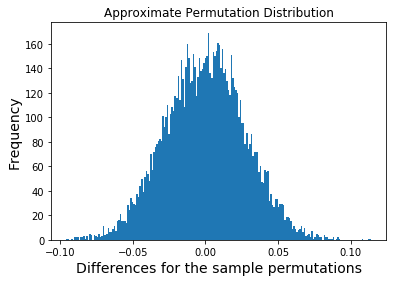

In [34]:
plt.hist(list,bins=200)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');

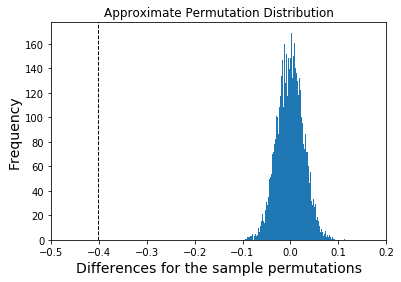

In [35]:
plt.hist(list,bins=200)
plt.axvline( np.mean(ncaPrice)-np.mean(caPrice),color='k', linestyle='dashed', linewidth=1)
plt.xlim(-0.5,0.2)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');